<a href="https://colab.research.google.com/github/sofialegelius/AH2179/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/main/ProjectAssignmentData/Dataset-PT.csv'

df = pd.read_csv(url)

df.columns = df.iloc[0]
df = df[1:]

df.iloc[:, 0:14] = df.iloc[:, 0:14].astype(float)
df.iloc[:, 14:18] = df.iloc[:, 14:18].astype(str)
df.iloc[:, 18:31] = df.iloc[:, 18:31].astype(int)

df.head(30)

<ipython-input-16-4721ad389f2a>:6: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
1,20220108.0,4.0,41344.0,1.0,151.0,0.0,0.0,120.0,100.0,100.0,...,0,0,0,0,1,0,1,0,0,1
2,20220108.0,4.0,41344.0,2.0,185.0,24.0,171.0,45.0,151.0,100.0,...,0,0,0,0,1,0,1,0,0,1
3,20220108.0,4.0,41344.0,3.0,186.0,0.0,55.0,41.0,185.0,100.0,...,0,0,0,0,1,0,1,0,0,1
4,20220108.0,4.0,41344.0,4.0,202.0,12.0,42.0,94.0,186.0,100.0,...,0,0,0,0,1,0,1,0,0,1
5,20220108.0,4.0,41344.0,5.0,242.0,21.0,98.0,86.0,202.0,100.0,...,0,0,0,0,1,0,1,0,0,1
6,20220108.0,4.0,41344.0,6.0,260.0,13.0,105.0,38.0,242.0,100.0,...,0,0,0,0,1,0,1,0,0,1
7,20220108.0,4.0,41344.0,7.0,278.0,12.0,43.0,79.0,260.0,100.0,...,0,0,0,0,1,0,1,0,0,1
8,20220108.0,4.0,41344.0,8.0,272.0,8.0,85.0,97.0,278.0,100.0,...,0,0,0,0,1,0,1,0,0,1
9,20220108.0,4.0,41344.0,9.0,292.0,24.0,83.0,47.0,272.0,100.0,...,0,0,0,0,1,0,1,0,0,1
10,20220108.0,4.0,41344.0,10.0,351.0,9.0,43.0,85.0,292.0,100.0,...,0,0,0,0,1,0,1,0,0,1


#Delay Statistics: put in the graphs we made in the beginning

#Delay predictions

In [17]:
#change the type of data

object_columns = df.select_dtypes(include='object').columns
print(object_columns)
for col in object_columns:
  if col!='weather'  and col!='temperature' and col!='day_of_week' and col!='time_of_day':
    df[col] = df[col].astype('Float64')
object_columns = df.select_dtypes(include='float64').columns

Index(['Calendar_date', 'route_id', 'bus_id', 'stop_sequence', 'arrival_delay',
       'dwell_time', 'travel_time_for_previous_section',
       'scheduled_travel_time', 'upstream_stop_delay', 'origin_delay',
       'previous_bus_delay', 'previous_trip_travel_time', 'traffic_condition',
       'recurrent_delay', 'weather', 'temperature', 'day_of_week',
       'time_of_day', 'factor(weather)Light_Rain', 'factor(weather)Light_Snow',
       'factor(weather)Normal', 'factor(weather)Rain', 'factor(weather)Snow',
       'factor(temperature)Cold', 'factor(temperature)Extra_cold',
       'factor(temperature)Normal', 'factor(day_of_week)weekday',
       'factor(day_of_week)weekend', 'factor(time_of_day)Afternoon_peak',
       'factor(time_of_day)Morning_peak', 'factor(time_of_day)Off-peak'],
      dtype='object', name=0)


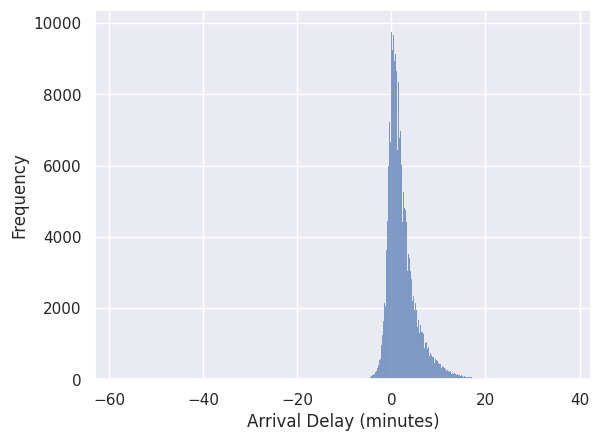

In [18]:
#plot frequency map of bus delay

%matplotlib inline
sns.set()

df['arrival_delay_minutes'] = df['arrival_delay']/60
sns.histplot(x=df['arrival_delay_minutes'])

plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

In [19]:
#Calculate the correlation between arrival delay and other factors that might be  related to arrival delay

df = df.drop(['arrival_delay_minutes', 'Calendar_date', 'bus_id', 'route_id', 'day_of_week', 'time_of_day', 'temperature', 'weather'], axis=1)

corr_matrix = df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

,arrival_delay
0,
arrival_delay,1.000000
upstream_stop_delay,0.975019
origin_delay,0.716324
previous_bus_delay,0.265434
factor(day_of_week)weekend,0.190783
factor(time_of_day)Off-peak,0.138109
stop_sequence,0.092616
dwell_time,0.089433
travel_time_for_previous_section,0.081113


In [20]:
#Split Dataset & Scalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(['arrival_delay'], axis=1)
y = df['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
#Training with different model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt



# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)





# KNN
# model = KNeighborsRegressor(n_neighbors=5, weights='distance')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# param_grid = {
#     'n_neighbors': [4, 5, 7],
#     'weights': ['uniform', 'distance']
# }

# grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_scaled, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Negative MSE:", best_score)

# best_knn = XGBRegressor(
#     n_neighbors=best_params['n_neighbors'],
#     weights=best_params['weights']
# )

# best_knn.fit(X_train_scaled, y_train)
# y_pred = best_knn.predict(X_test_scaled)




# # XGBoost
# model_xgb = XGBRegressor(enable_categorical = 1)
# model_xgb.fit(X_train, y_train)
# y_pred = model_xgb.predict(X_test)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     #'colsample_bytree': [0.8, 1.0]
# }

# grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_scaled, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Negative MSE:", best_score)

# best_xgb = XGBRegressor(
#     n_estimators=best_params['n_estimators'],
#     max_depth=best_params['max_depth'],
#     learning_rate=best_params['learning_rate'],
#     subsample=best_params['subsample'],
#     #colsample_bytree=best_params['colsample_bytree']
# )
# best_xgb.fit(X_train_scaled, y_train)
# y_pred = best_xgb.predict(X_test_scaled)



# #Random Forest

# model = RandomForestRegressor()
# model.fit(X_train_scaled, y_train)
# y_pred = model.predict(X_test_scaled)

# model_rf = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [50, 100],  # number of decision tree
#     # 'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     # 'bootstrap': [True, False],
# }

# grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Negative MSE:", best_score)

# best_rf = RandomForestRegressor(
#     n_estimators=best_params['n_estimators'],
#     # max_depth=best_params['max_depth'],
#     min_samples_split=best_params['min_samples_split'],
#     min_samples_leaf=best_params['min_samples_leaf'],
#     # bootstrap=best_params['bootstrap'],
#     random_state=42
# )

# best_rf.fit(X_train_scaled, y_train)
# y_pred = best_rf.predict(X_test_scaled)

MAE: 12.5874
MSE: 397.2203
R^2: 0.9894


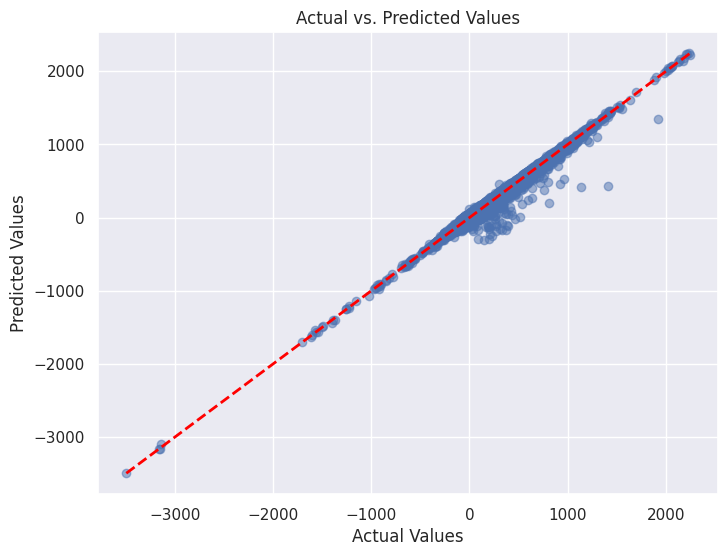

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

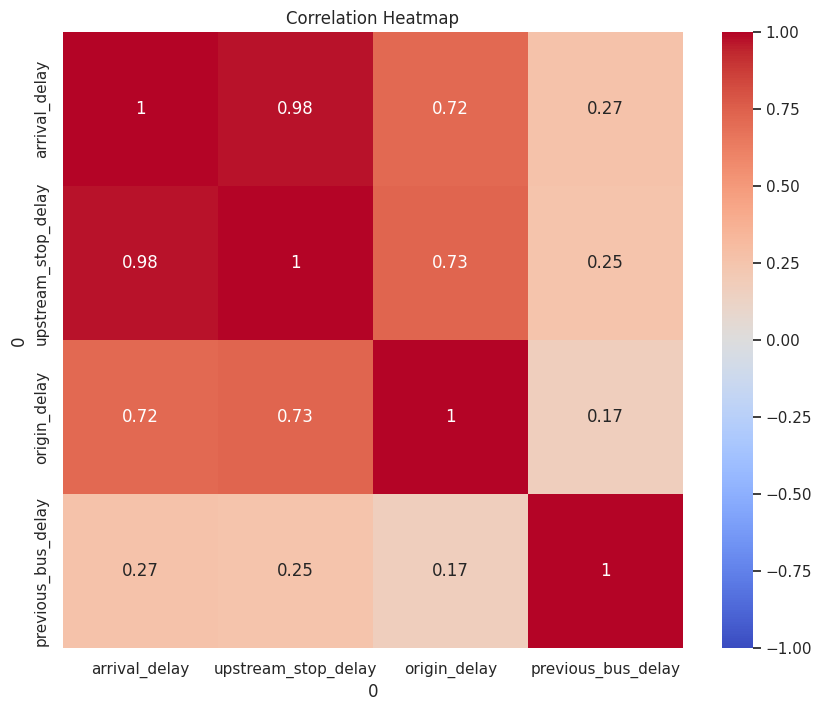

In [23]:
#Find out high related factors

corr_matrix = df.corr()
abs_corr_arrival_delay = corr_matrix['arrival_delay'].abs()
columns_to_drop = abs_corr_arrival_delay[abs_corr_arrival_delay < 0.2].index
high_corr = df.drop(columns=columns_to_drop)
high_corr.head()

corr_df = high_corr.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 12})
plt.title('Correlation Heatmap')
# plt.xticks(rotation=45)
plt.show()

MAE: 31.6072
MSE: 1897.4316
R-squared: 0.9493


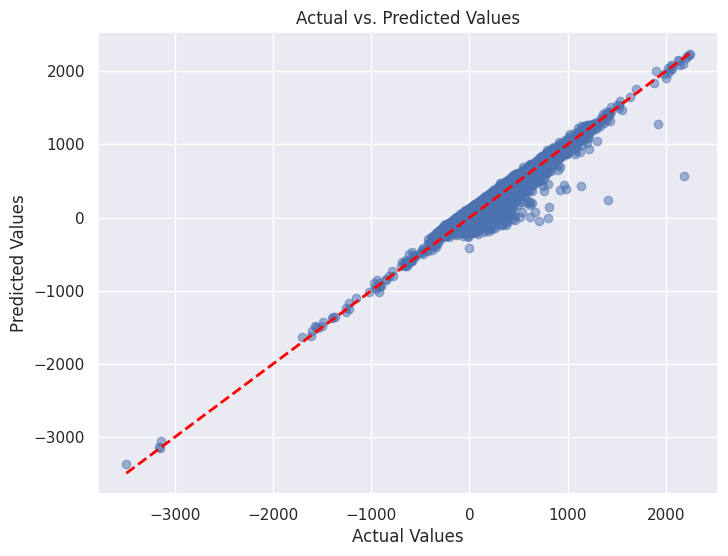

In [24]:
#Modelling using high related factors

x = high_corr.drop(['arrival_delay'], axis=1)
y = high_corr['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

In [25]:
#Make selection for set combination 1

df_set1 = df[df["factor(weather)Normal"]==1]
# df_set1 = df[df["factor(time_of_day)Off-peak"]==1]
df_set1 = df[df["stop_sequence"].isin([1, 2, 5, 6, 9, 10, 13, 15, 17, 18, 25])]
df_set1 = df_set1.drop("stop_sequence", axis=1)
df_set1

,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,previous_trip_travel_time,traffic_condition,recurrent_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
1,151.0,0.0,0.0,120.0,100.0,100.0,160.0,216.0,168.666667,161.25,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,185.0,24.0,171.0,45.0,151.0,100.0,198.0,47.0,46.333333,36.5,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,242.0,21.0,98.0,86.0,202.0,100.0,256.0,123.0,102.0,88.75,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,260.0,13.0,105.0,38.0,242.0,100.0,255.0,37.0,35.0,37.25,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,292.0,24.0,83.0,47.0,272.0,100.0,210.0,30.0,37.666667,33.5,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545089,288.0,27.0,28.0,82.0,280.0,12.0,116.0,49.0,56.333333,68.532895,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
545091,254.0,37.0,68.0,75.0,250.0,12.0,82.0,35.0,42.333333,49.894737,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
545093,261.0,49.0,88.0,78.0,227.0,12.0,34.0,59.0,61.333333,63.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
545094,265.0,34.0,63.0,72.0,261.0,12.0,16.0,54.0,72.333333,73.901961,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


MAE: 13.5965
MSE: 457.0231
R-squared: 0.9863


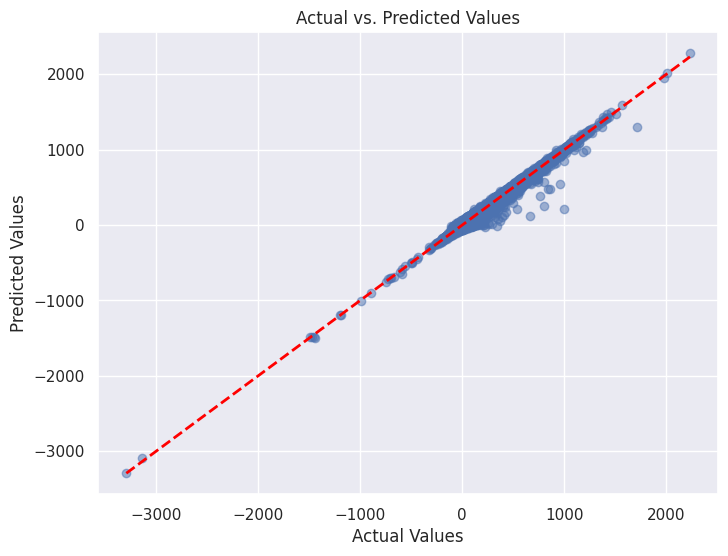

In [26]:
x = df_set1.drop(['arrival_delay'], axis=1)
y = df_set1['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

In [27]:
#Make selection for set combination 2

# df_set2 = df[(df["factor(weather)Normal"] == 1) | (df["factor(time_of_day)Off-peak"] == 0)]
# df_set2 = df[df["factor(time_of_day)Off-peak"]==0]
# df_set2 = df[df["stop_sequence"].isin([1, 2, 5, 6, 9, 10, 13, 15, 17, 18, 25])]
df_set2 = df[df["stop_sequence"].isin([3,4,7,8,11,12,14,16,19,20,21,22,23,24,26,27])]
df_set2 = df_set2.drop("stop_sequence", axis=1)
df_set2

,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,previous_trip_travel_time,traffic_condition,recurrent_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
3,186.0,0.0,55.0,41.0,185.0,100.0,189.0,32.0,36.666667,34.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,202.0,12.0,42.0,94.0,186.0,100.0,200.0,89.0,88.0,87.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,278.0,12.0,43.0,79.0,260.0,100.0,238.0,62.0,73.0,69.25,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,272.0,8.0,85.0,97.0,278.0,100.0,213.0,72.0,83.333333,72.5,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
11,346.0,13.0,135.0,91.0,351.0,100.0,204.0,55.0,64.0,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545098,341.0,26.0,87.0,58.0,299.0,12.0,65.0,69.0,53.666667,46.555556,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
545099,344.0,13.0,74.0,44.0,341.0,12.0,47.0,26.0,32.666667,35.065359,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
545100,330.0,15.0,34.0,92.0,344.0,12.0,68.0,93.0,77.0,70.79085,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
545102,331.0,0.0,35.0,58.0,339.0,12.0,79.0,54.0,50.666667,52.640523,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


MAE: 11.9123
MSE: 342.9993
R-squared: 0.9915


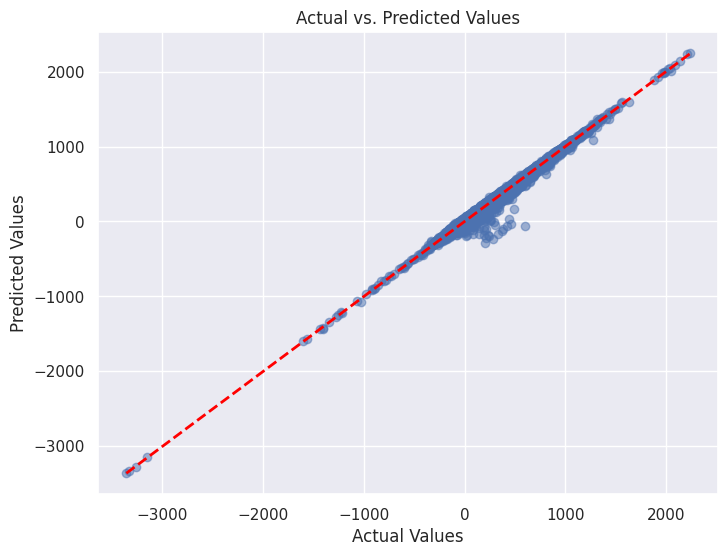

In [28]:
x = df_set2.drop(['arrival_delay'], axis=1)
y = df_set2['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

# STEP 1 : DATA DESCRIPTION

In [29]:
df = pd.read_csv(url)

df.columns = df.iloc[0]
df = df[1:]

df.iloc[:, 0:14] = df.iloc[:, 0:14].astype(float)
df.iloc[:, 14:18] = df.iloc[:, 14:18].astype(str)
df.iloc[:, 18:31] = df.iloc[:, 18:31].astype(int)



<ipython-input-29-8fe93ff31a19>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [30]:
def weekday(x):
  if x == 'weekend':
    return 1
  else :
    return 0

def week(row):
  return weekday(row['day_of_week'])

df['weekday']=df.apply(week, axis=1)
df = df.astype({'weekday':'int'})

In [31]:
df['arrival_delay_minutes'] = df['arrival_delay']/60

In [32]:
df = df.astype({'arrival_delay_minutes':'float','arrival_delay':'float','dwell_time':'float',
                'travel_time_for_previous_section':'float','scheduled_travel_time':'float','upstream_stop_delay':'float',
                'origin_delay':'float','previous_bus_delay':'float','previous_trip_travel_time':'float',
                'previous_trip_travel_time':'float','traffic_condition':'float','recurrent_delay':'float' })
#df = df.astype({'factor(weather)Light_Rain':'int','factor(weather)Light_Snow':'int','factor(weather)Normal':'int','factor(weather)Snow':'int''factor(weather)Rain':'int'})


# STEP 2 : DATA MERGING PER TRIPS

In [33]:
df['trip']=(df.index-1)//27
df
test = df[['stop_sequence','trip']].groupby(['trip']).mean()
summary = test.describe()
summary = summary.transpose()
summary
#We verify that the trip numeration actually correspond to reality (only one possible value of mean, equal to 14)

,count,unique,top,freq
0,,,,
stop_sequence,20189.0,1.0,14.0,20189.0


In [34]:
df.head()

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak,weekday,arrival_delay_minutes,trip
1,20220108.0,4.0,41344.0,1.0,151.0,0.0,0.0,120.0,100.0,100.0,...,0,1,0,1,0,0,1,1,2.516667,0
2,20220108.0,4.0,41344.0,2.0,185.0,24.0,171.0,45.0,151.0,100.0,...,0,1,0,1,0,0,1,1,3.083333,0
3,20220108.0,4.0,41344.0,3.0,186.0,0.0,55.0,41.0,185.0,100.0,...,0,1,0,1,0,0,1,1,3.100000,0
4,20220108.0,4.0,41344.0,4.0,202.0,12.0,42.0,94.0,186.0,100.0,...,0,1,0,1,0,0,1,1,3.366667,0
5,20220108.0,4.0,41344.0,5.0,242.0,21.0,98.0,86.0,202.0,100.0,...,0,1,0,1,0,0,1,1,4.033333,0


In [35]:
df_trips_delays = df.pivot_table(index='trip',columns='stop_sequence',values=['arrival_delay_minutes'])

In [36]:
columns = [('arrival_delay_minutes', i) for i in range(1,28)]
df_trips = pd.DataFrame()

for i in range(27):
    df_trips[f'stop_{i + 1}'] = df_trips_delays.values[:, i]

df_trips_delays = df_trips.copy()
df_trips_delays

,stop_1,stop_2,stop_3,stop_4,stop_5,stop_6,stop_7,stop_8,stop_9,stop_10,...,stop_18,stop_19,stop_20,stop_21,stop_22,stop_23,stop_24,stop_25,stop_26,stop_27
0,2.516667,3.083333,3.100000,3.366667,4.033333,4.333333,4.633333,4.533333,4.866667,5.850000,...,7.433333,7.433333,6.983333,6.850000,6.683333,6.850000,7.183333,7.016667,6.933333,5.833333
1,0.950000,1.233333,0.950000,0.866667,1.750000,1.850000,1.816667,2.050000,2.383333,2.950000,...,4.700000,4.300000,3.583333,3.333333,3.016667,2.733333,2.250000,2.716667,2.966667,1.966667
2,0.800000,1.000000,0.516667,0.516667,1.600000,1.383333,1.433333,1.250000,1.516667,2.433333,...,2.033333,2.033333,1.600000,1.283333,0.933333,1.166667,1.016667,0.883333,1.100000,-0.133333
3,0.483333,0.700000,0.433333,0.100000,0.300000,0.466667,0.400000,0.366667,0.633333,0.850000,...,0.316667,0.183333,-0.283333,-0.400000,-0.716667,-0.883333,-0.983333,-0.366667,-0.233333,-1.333333
4,0.850000,1.300000,1.433333,1.550000,2.483333,2.766667,3.283333,3.616667,3.716667,4.000000,...,5.300000,5.000000,5.033333,4.800000,4.433333,4.583333,4.250000,4.516667,4.466667,3.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20184,-0.500000,-0.116667,-0.150000,-0.416667,0.216667,1.016667,1.650000,0.983333,1.433333,2.100000,...,3.316667,3.433333,3.466667,2.950000,2.483333,2.483333,2.250000,2.233333,1.966667,0.900000
20185,0.016667,0.416667,0.700000,0.950000,1.233333,1.900000,1.666667,1.416667,1.766667,2.000000,...,3.783333,4.116667,4.500000,4.350000,4.266667,4.400000,4.133333,4.616667,4.633333,3.683333
20186,1.466667,2.100000,1.733333,1.600000,2.283333,2.950000,2.800000,2.216667,2.200000,2.866667,...,4.083333,4.083333,4.116667,4.116667,4.266667,4.483333,4.500000,4.716667,4.600000,3.733333
20187,0.650000,1.750000,1.650000,1.116667,1.483333,2.600000,2.433333,2.600000,2.816667,2.800000,...,0.266667,0.283333,-0.100000,0.900000,1.083333,0.783333,1.133333,1.150000,1.316667,0.700000


In [37]:
# getting rid of the outliers - bus with more the ... minutes advance or using z-score ?

## EVALUATION THE CORRELATION BETWEEN DELAYS ON ONE TRIP

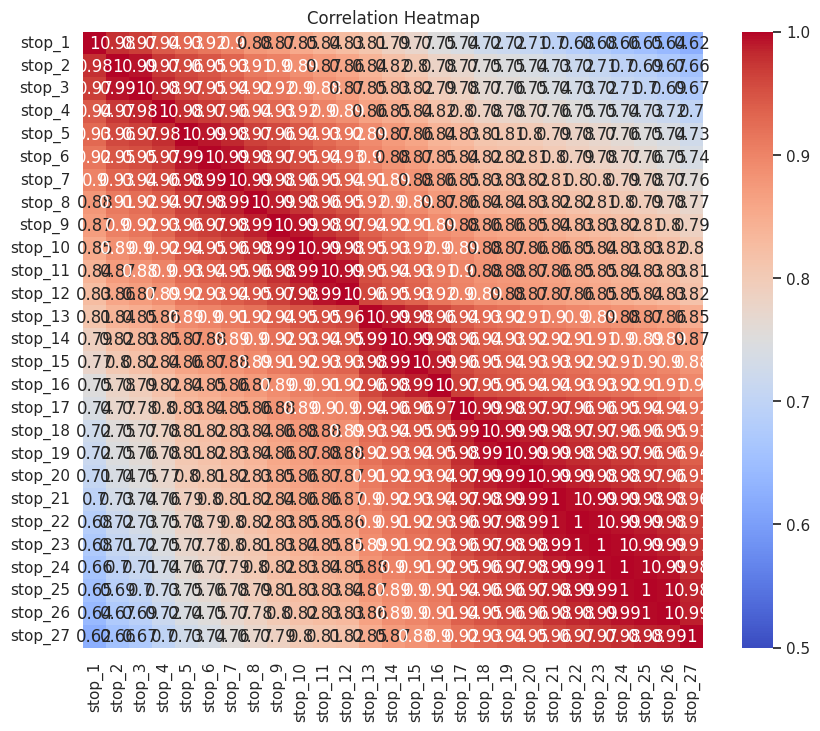

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df_trips_delays.corr(), annot=True, cmap='coolwarm', vmin=0.5, vmax=1)
#The minimum color of the heat graph is set to 0.5, otherwise everything is red
plt.title('Correlation Heatmap')
plt.show()

In [39]:
df_trips_delays.corr()
df_trips_delays.corr().to_excel('corr.xlsx')

# STEP 3 : Selecting the stops with a correlation higher than 0.95

Based on the correlation matrix, we will keep just enough bus stops to have every stops at least at 0.95 correlation with one of the selected => It lead to stops 3, 11, 17, 27

In [40]:
df['origin_delay_minutes']=df['origin_delay']/60
columns_unique = ['previous_bus_delay','traffic_condition'] #the columns that normally changes at each stop = we only keep them at the selected stop
columns_same = ['Calendar_date','bus_id','origin_delay_minutes','weekday',
                'factor(weather)Light_Rain','factor(weather)Rain','factor(weather)Light_Snow','factor(weather)Snow','factor(weather)Normal',
                'factor(temperature)Normal','factor(temperature)Cold','factor(temperature)Extra_cold',
                'factor(time_of_day)Off-peak','factor(time_of_day)Afternoon_peak','factor(time_of_day)Morning_peak'] #These one stay the same along the whole trip - we can keep them unchanged
columns_add = ['dwell_time','previous_trip_travel_time','scheduled_travel_time', 'recurrent_delay','travel_time_for_previous_section'] #we have to sum them between the stops


In [41]:
df_rep = df.groupby('trip').first()[columns_same].reset_index()

In [42]:
def additive(row,df,column):
  df_sub=df[df['trip']==row['trip']]
  row[column+'_3'],row[column+'_11'],row[column+'_17'],row[column+'_27']=0,0,0,0
  for idx, row2 in df_sub.iterrows():
    if row2['stop_sequence']<4:
      row[column+'_3']+=row2[column] #we make an addition of the values corresponding to stop 1, 2 and 3
    elif row2['stop_sequence']<12:
      row[column+'_11']+=row2[column]
    elif row2['stop_sequence']<18:
      row[column+'_17']+=row2[column]
    else:
      row[column+'_27']+=row2[column]
  return row


for column in columns_add :
  df_rep=df_rep.apply(lambda row: additive(row, df, column), axis=1)

In [43]:
def unique(row,df,column):
  df_sub = df[df['trip']==row['trip']]
  row[column+'_3'],row[column+'_11'],row[column+'_17'],row[column+'_27']=0,0,0,0
  for idx, row2 in df_sub.iterrows():
    if row2['stop_sequence'] == 3:
      row[column+'_3']=row2[column] #we keep the value at the selected stop
    if row2['stop_sequence'] == 11:
      row[column+'_11']=row2[column] #we keep the value at the selected stop
    if row2['stop_sequence'] == 17:
      row[column+'_17']=row2[column] #we keep the value at the selected stop
    if row2['stop_sequence'] == 27:
      row[column+'_27']=row2[column] #we keep the value at the selected stop
  return row

for column in columns_unique :
  df_rep=df_rep.apply(lambda row: unique(row, df, column), axis=1)

In [44]:
df_rep.head(5)

,trip,Calendar_date,bus_id,origin_delay_minutes,weekday,factor(weather)Light_Rain,factor(weather)Rain,factor(weather)Light_Snow,factor(weather)Snow,factor(weather)Normal,...,travel_time_for_previous_section_17,travel_time_for_previous_section_27,previous_bus_delay_3,previous_bus_delay_11,previous_bus_delay_17,previous_bus_delay_27,traffic_condition_3,traffic_condition_11,traffic_condition_17,traffic_condition_27
0,0.0,20220108.0,41344.0,1.666667,1.0,0.0,0.0,1.0,0.0,0.0,...,477.0,533.0,189.0,204.0,168.0,86.0,36.666667,64.000000,78.000000,41.666667
1,1.0,20220108.0,41732.0,0.283333,1.0,0.0,0.0,1.0,0.0,0.0,...,447.0,635.0,186.0,346.0,424.0,350.0,39.333333,69.000000,54.666667,42.000000
2,2.0,20220108.0,44417.0,0.166667,1.0,0.0,0.0,1.0,0.0,0.0,...,344.0,501.0,57.0,152.0,235.0,118.0,37.333333,64.666667,79.000000,43.000000
3,3.0,20220108.0,45537.0,0.200000,1.0,0.0,0.0,1.0,0.0,0.0,...,348.0,569.0,31.0,134.0,111.0,-8.0,35.333333,66.666667,82.666667,40.333333
4,4.0,20220108.0,41370.0,0.050000,1.0,0.0,0.0,1.0,0.0,0.0,...,452.0,539.0,26.0,34.0,-17.0,-80.0,34.333333,61.333333,79.666667,40.333333


In [45]:
df_trips_delays.head(5)

,stop_1,stop_2,stop_3,stop_4,stop_5,stop_6,stop_7,stop_8,stop_9,stop_10,...,stop_18,stop_19,stop_20,stop_21,stop_22,stop_23,stop_24,stop_25,stop_26,stop_27
0,2.516667,3.083333,3.100000,3.366667,4.033333,4.333333,4.633333,4.533333,4.866667,5.850000,...,7.433333,7.433333,6.983333,6.850000,6.683333,6.850000,7.183333,7.016667,6.933333,5.833333
1,0.950000,1.233333,0.950000,0.866667,1.750000,1.850000,1.816667,2.050000,2.383333,2.950000,...,4.700000,4.300000,3.583333,3.333333,3.016667,2.733333,2.250000,2.716667,2.966667,1.966667
2,0.800000,1.000000,0.516667,0.516667,1.600000,1.383333,1.433333,1.250000,1.516667,2.433333,...,2.033333,2.033333,1.600000,1.283333,0.933333,1.166667,1.016667,0.883333,1.100000,-0.133333
3,0.483333,0.700000,0.433333,0.100000,0.300000,0.466667,0.400000,0.366667,0.633333,0.850000,...,0.316667,0.183333,-0.283333,-0.400000,-0.716667,-0.883333,-0.983333,-0.366667,-0.233333,-1.333333
4,0.850000,1.300000,1.433333,1.550000,2.483333,2.766667,3.283333,3.616667,3.716667,4.000000,...,5.300000,5.000000,5.033333,4.800000,4.433333,4.583333,4.250000,4.516667,4.466667,3.766667


In [46]:
# We finally add the delays at each trip
df_rep['stop_3']=df_trips_delays['stop_3']
df_rep['stop_11']=df_trips_delays['stop_11']
df_rep['stop_17']=df_trips_delays['stop_17']
df_rep['stop_27']=df_trips_delays['stop_27']
df_rep

,trip,Calendar_date,bus_id,origin_delay_minutes,weekday,factor(weather)Light_Rain,factor(weather)Rain,factor(weather)Light_Snow,factor(weather)Snow,factor(weather)Normal,...,previous_bus_delay_17,previous_bus_delay_27,traffic_condition_3,traffic_condition_11,traffic_condition_17,traffic_condition_27,stop_3,stop_11,stop_17,stop_27
0,0.0,20220108.0,41344.0,1.666667,1.0,0.0,0.0,1.0,0.0,0.0,...,168.0,86.0,36.666667,64.000000,78.000000,41.666667,3.100000,5.766667,7.066667,5.833333
1,1.0,20220108.0,41732.0,0.283333,1.0,0.0,0.0,1.0,0.0,0.0,...,424.0,350.0,39.333333,69.000000,54.666667,42.000000,0.950000,2.533333,3.916667,1.966667
2,2.0,20220108.0,44417.0,0.166667,1.0,0.0,0.0,1.0,0.0,0.0,...,235.0,118.0,37.333333,64.666667,79.000000,43.000000,0.516667,2.233333,1.850000,-0.133333
3,3.0,20220108.0,45537.0,0.200000,1.0,0.0,0.0,1.0,0.0,0.0,...,111.0,-8.0,35.333333,66.666667,82.666667,40.333333,0.433333,0.566667,-0.283333,-1.333333
4,4.0,20220108.0,41370.0,0.050000,1.0,0.0,0.0,1.0,0.0,0.0,...,-17.0,-80.0,34.333333,61.333333,79.666667,40.333333,1.433333,3.716667,4.716667,3.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20184,20184.0,20220630.0,45529.0,0.283333,0.0,0.0,0.0,0.0,0.0,1.0,...,191.0,259.0,44.000000,77.333333,74.333333,40.666667,-0.150000,1.700000,3.533333,0.900000
20185,20185.0,20220630.0,44068.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,...,212.0,54.0,44.000000,77.000000,74.666667,44.666667,0.700000,1.750000,3.150000,3.683333
20186,20186.0,20220630.0,41345.0,0.350000,0.0,0.0,0.0,0.0,0.0,1.0,...,189.0,221.0,38.000000,78.666667,68.666667,44.000000,1.733333,2.366667,3.133333,3.733333
20187,20187.0,20220630.0,41353.0,0.616667,0.0,0.0,0.0,0.0,0.0,1.0,...,188.0,224.0,33.333333,77.333333,64.666667,39.000000,1.650000,2.100000,0.566667,0.700000


In [47]:
df_rep.to_csv('df_rep_2.csv', sep=';')

In [48]:
df_rep.columns

Index(['trip', 'Calendar_date', 'bus_id', 'origin_delay_minutes', 'weekday',
       'factor(weather)Light_Rain', 'factor(weather)Rain',
       'factor(weather)Light_Snow', 'factor(weather)Snow',
       'factor(weather)Normal', 'factor(temperature)Normal',
       'factor(temperature)Cold', 'factor(temperature)Extra_cold',
       'factor(time_of_day)Off-peak', 'factor(time_of_day)Afternoon_peak',
       'factor(time_of_day)Morning_peak', 'dwell_time_3', 'dwell_time_11',
       'dwell_time_17', 'dwell_time_27', 'previous_trip_travel_time_3',
       'previous_trip_travel_time_11', 'previous_trip_travel_time_17',
       'previous_trip_travel_time_27', 'scheduled_travel_time_3',
       'scheduled_travel_time_11', 'scheduled_travel_time_17',
       'scheduled_travel_time_27', 'recurrent_delay_3', 'recurrent_delay_11',
       'recurrent_delay_17', 'recurrent_delay_27',
       'travel_time_for_previous_section_3',
       'travel_time_for_previous_section_11',
       'travel_time_for_previous_se

In [49]:
corr_matrix = df_rep.corr()
corr_matrix['stop_3'].sort_values(ascending=False).head(10)
## Others stops are still highly correlated to the previous ones, we can make seperate regression on them

,stop_3
0,
stop_3,1.000000
origin_delay_minutes,0.916625
stop_11,0.884405
stop_17,0.783760
stop_27,0.674331
travel_time_for_previous_section_3,0.366682
dwell_time_3,0.225200
previous_bus_delay_3,0.217576
previous_bus_delay_17,0.213745


# STEP 4 : "DOMINO" LINEAR REGRESSION ON df_rep

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.ioff()

In [51]:
x_domino = df_rep[[ 'dwell_time_3','previous_trip_travel_time_3','scheduled_travel_time_3','recurrent_delay_3', 'traffic_condition_3','previous_bus_delay_3','travel_time_for_previous_section_3',
                    'dwell_time_11','previous_trip_travel_time_11','scheduled_travel_time_11','recurrent_delay_11', 'traffic_condition_11','previous_bus_delay_11','travel_time_for_previous_section_11',
                    'dwell_time_17','previous_trip_travel_time_17','scheduled_travel_time_17','recurrent_delay_17', 'traffic_condition_17','previous_bus_delay_17','travel_time_for_previous_section_17',
                    'dwell_time_27','previous_trip_travel_time_27','scheduled_travel_time_27','recurrent_delay_27', 'traffic_condition_27','previous_bus_delay_27','travel_time_for_previous_section_27']]


In [52]:
x_domino.iloc[:,7:14] #you can test the values added to x later here

,dwell_time_11,previous_trip_travel_time_11,scheduled_travel_time_11,recurrent_delay_11,traffic_condition_11,previous_bus_delay_11,travel_time_for_previous_section_11
0,112.0,583.0,617.0,551.500000,64.000000,204.0,634.0
1,94.0,665.0,648.0,574.200000,69.000000,346.0,621.0
2,227.0,649.0,648.0,586.666667,64.666667,152.0,489.0
3,143.0,524.0,648.0,577.714286,66.666667,134.0,495.0
4,190.0,513.0,693.0,528.000000,61.333333,34.0,617.0
...,...,...,...,...,...,...,...
20184,253.0,659.0,798.0,605.006667,77.333333,186.0,615.0
20185,286.0,656.0,798.0,605.344371,77.000000,102.0,525.0
20186,211.0,575.0,798.0,605.144737,78.666667,105.0,584.0
20187,225.0,625.0,798.0,605.274510,77.333333,142.0,568.0


In [53]:
x = df_rep[[ 'origin_delay_minutes','weekday',
            'factor(weather)Light_Rain','factor(weather)Rain','factor(weather)Light_Snow','factor(weather)Snow','factor(weather)Normal',
                'factor(temperature)Normal','factor(temperature)Cold','factor(temperature)Extra_cold',
                'factor(time_of_day)Off-peak','factor(time_of_day)Afternoon_peak','factor(time_of_day)Morning_peak']]

In [54]:
train_index, test_index = train_test_split(range(len(x)), test_size=0.2, random_state=42)#for the whole trip generalisation

y = df_rep[['stop_3','stop_11','stop_17','stop_27']]
Y_train = y.iloc[train_index]
Y_test = y.iloc[test_index]
Y_pred = pd.DataFrame(index=Y_test.index)

MAE, MSE, R_2 = [], [], [] # the differente quality values will be calculated at each regression


In [55]:
# we add the information about stop_3 to x
x = x.merge(x_domino.iloc[:,:7],left_index=True, right_index=True)
x.head(5)

,origin_delay_minutes,weekday,factor(weather)Light_Rain,factor(weather)Rain,factor(weather)Light_Snow,factor(weather)Snow,factor(weather)Normal,factor(temperature)Normal,factor(temperature)Cold,factor(temperature)Extra_cold,factor(time_of_day)Off-peak,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,dwell_time_3,previous_trip_travel_time_3,scheduled_travel_time_3,recurrent_delay_3,traffic_condition_3,previous_bus_delay_3,travel_time_for_previous_section_3
0,1.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24.0,295.0,206.0,231.750000,36.666667,189.0,226.0
1,0.283333,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29.0,268.0,235.0,239.000000,39.333333,186.0,208.0
2,0.166667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,246.0,235.0,240.166667,37.333333,57.0,195.0
3,0.200000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,30.0,221.0,235.0,237.428571,35.333333,31.0,180.0
4,0.050000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,55.0,219.0,235.0,205.250000,34.333333,26.0,216.0


In [56]:
# REGRESSION ON STOP 3
X_train = x.iloc[train_index]
X_test = x.iloc[test_index]

y_train = Y_train['stop_3']
y_test = Y_test['stop_3']

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

MAE.append(mean_absolute_error(y_test, y_pred))
MSE.append(mean_squared_error(y_test, y_pred))
R_2.append(r2_score(y_test, y_pred))

Y_pred['stop_3']=y_pred

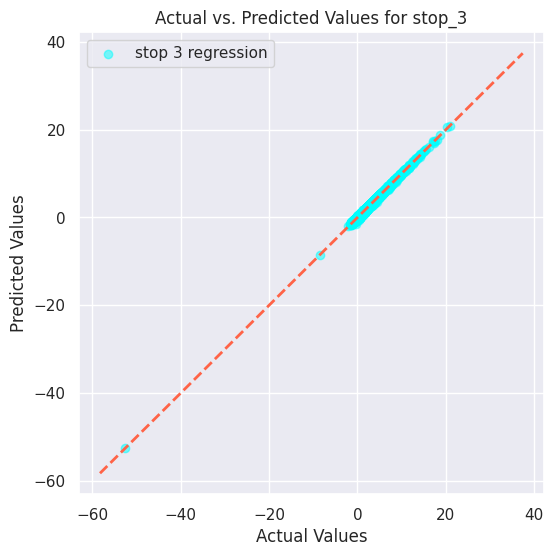

In [57]:
import matplotlib.pyplot as plt

# Figure 1 pour stop_3
plt.figure(figsize=(6, 6))
plt.scatter(Y_test['stop_3'], Y_pred['stop_3'], alpha=0.5, color='cyan', label='stop 3 regression')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for stop_3")
plt.plot([min(y.min()), max(y.max())], [min(y.min()), max(y.max())], linestyle='--', color='tomato', lw=2)
plt.legend()
plt.show()

In [58]:
# we add the informations about stop 11 in x
x = x.merge(x_domino.iloc[:,7:14],left_index=True, right_index=True)
x.head(3)

,origin_delay_minutes,weekday,factor(weather)Light_Rain,factor(weather)Rain,factor(weather)Light_Snow,factor(weather)Snow,factor(weather)Normal,factor(temperature)Normal,factor(temperature)Cold,factor(temperature)Extra_cold,...,traffic_condition_3,previous_bus_delay_3,travel_time_for_previous_section_3,dwell_time_11,previous_trip_travel_time_11,scheduled_travel_time_11,recurrent_delay_11,traffic_condition_11,previous_bus_delay_11,travel_time_for_previous_section_11
0,1.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,36.666667,189.0,226.0,112.0,583.0,617.0,551.500000,64.000000,204.0,634.0
1,0.283333,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,39.333333,186.0,208.0,94.0,665.0,648.0,574.200000,69.000000,346.0,621.0
2,0.166667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,37.333333,57.0,195.0,227.0,649.0,648.0,586.666667,64.666667,152.0,489.0


In [59]:
# REGRESSION ON STOP 11 using STOP 3 results
X_train = x.iloc[train_index]
X_train['stop_3_pred'] =y_pred_train #we add the predicted STOP 3 in X_train
X_test = x.iloc[test_index]
X_test['stop_3_pred'] =y_pred # #we add the predicted STOP 3 in X_test

y_train = Y_train['stop_11']
y_test = Y_test['stop_11']

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

MAE.append(mean_absolute_error(y_test, y_pred))
MSE.append(mean_squared_error(y_test, y_pred))
R_2.append(r2_score(y_test, y_pred))

Y_pred['stop_11']=y_pred

<ipython-input-59-00a3437d1799>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['stop_3_pred'] =y_pred_train #we add the predicted STOP 3 in X_train
<ipython-input-59-00a3437d1799>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['stop_3_pred'] =y_pred # #we add the predicted STOP 3 in X_test


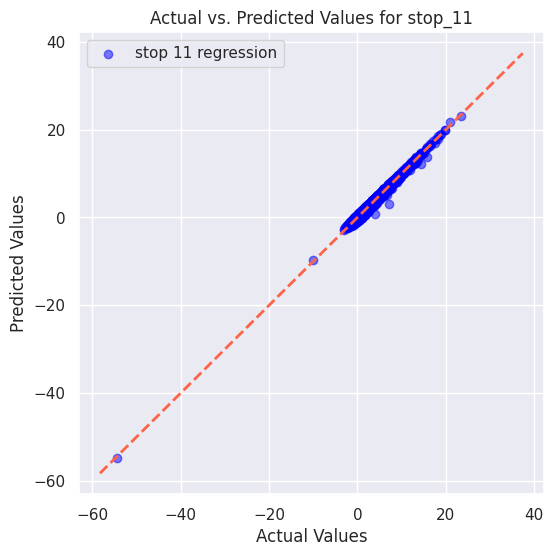

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(Y_test['stop_11'], Y_pred['stop_11'], alpha=0.5, color='blue', label='stop 11 regression')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for stop_11")
plt.plot([min(y.min()), max(y.max())], [min(y.min()), max(y.max())], linestyle='--', color='tomato', lw=2)
plt.legend()
plt.show()

In [61]:
# REGRESSION ON STOP 17 using STOP 3 and STOP 11 results
x = x.merge(x_domino.iloc[:,14:21],left_index=True, right_index=True) # we add the informations of the original dataset about stop 17 in x
X_train = x.iloc[train_index]
X_train['stop_11_pred'] =y_pred_train #we add the predicted STOP 11 in X_train
X_test = x.iloc[test_index]
X_test['stop_11_pred'] =y_pred # PREDICTED VALUES

y_train = Y_train['stop_17']
y_test = Y_test['stop_17']

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

MAE.append(mean_absolute_error(y_test, y_pred))
MSE.append(mean_squared_error(y_test, y_pred))
R_2.append(r2_score(y_test, y_pred))

Y_pred['stop_17']=y_pred

<ipython-input-61-2c2b2b5452a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['stop_11_pred'] =y_pred_train #we add the predicted STOP 11 in X_train
<ipython-input-61-2c2b2b5452a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['stop_11_pred'] =y_pred # PREDICTED VALUES


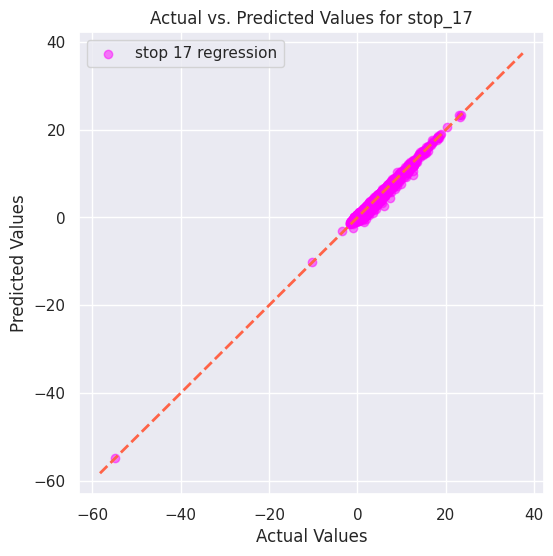

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(Y_test['stop_17'], Y_pred['stop_17'], alpha=0.5, color = 'magenta', label='stop 17 regression')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for stop_17")
plt.plot([min(y.min()), max(y.max())], [min(y.min()), max(y.max())], linestyle='--', color='tomato', lw=2)
plt.legend()
plt.show()

In [63]:
# REGRESSION ON STOP 27 using STOP 3 stop 11 and STOP 17 results
# always the same structure
x = x.merge(x_domino.iloc[:,21:],left_index=True, right_index=True)
X_train = x.iloc[train_index]
X_train['stop_17_pred'] =y_pred_train
X_test = x.iloc[test_index]
X_test['stop_17_pred'] =y_pred # PREDICTED VALUES

y_train = Y_train['stop_27']
y_test = Y_test['stop_27']

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

MAE.append(mean_absolute_error(y_test, y_pred))
MSE.append(mean_squared_error(y_test, y_pred))
R_2.append(r2_score(y_test, y_pred))

Y_pred['stop_27']=y_pred

<ipython-input-63-61f586b713d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['stop_17_pred'] =y_pred_train
<ipython-input-63-61f586b713d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['stop_17_pred'] =y_pred # PREDICTED VALUES


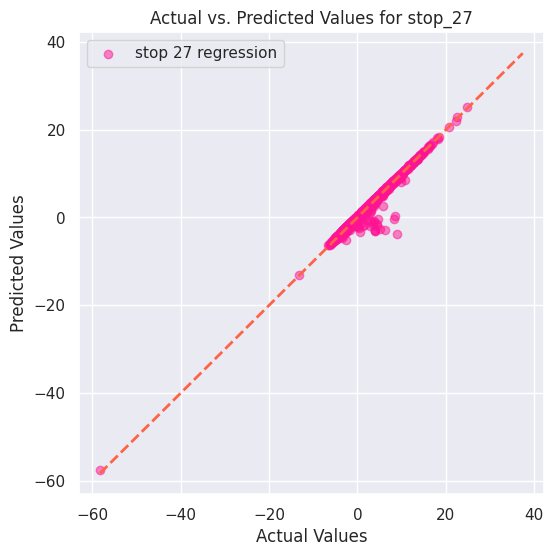

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(Y_test['stop_27'], Y_pred['stop_27'], alpha=0.5, color = 'deeppink', label='stop 27 regression')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for stop_27")
plt.plot([min(y.min()), max(y.max())], [min(y.min()), max(y.max())], linestyle='--', color='tomato', lw=2)
plt.legend()
plt.show()

[0.12495948291793824, 0.2591965118207396, 0.2705899026850692, 0.16063224938590567]
[0.026815726472285178, 0.11063260820065907, 0.15648450625245974, 0.2527677864582291]
[0.9961427553294774, 0.9884153908122638, 0.9862068037506039, 0.98330101187948]


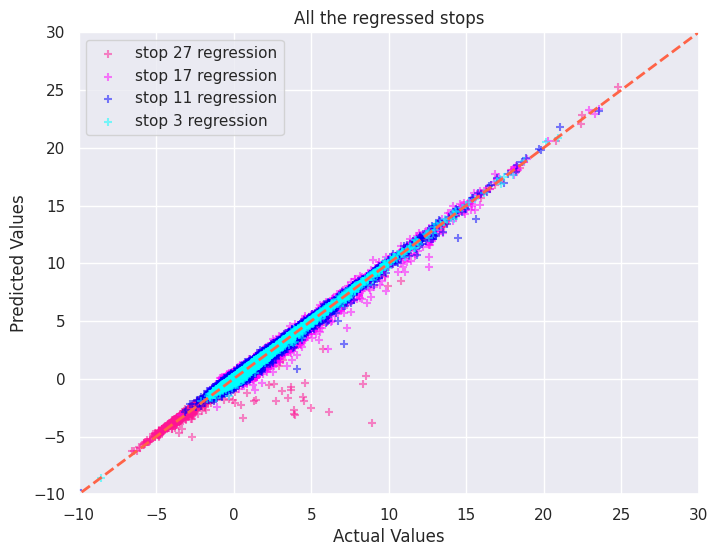

In [65]:
# print of the final results
print(MAE)
print(MSE)
print(R_2)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(Y_test['stop_27'], Y_pred['stop_27'], alpha=0.5, color='deeppink', label = 'stop 27 regression',marker='+')
plt.scatter(Y_test['stop_17'], Y_pred['stop_17'], alpha=0.5, color='magenta', label = 'stop 17 regression',marker='+')
plt.scatter(Y_test['stop_11'], Y_pred['stop_11'], alpha=0.5, color='blue', label = 'stop 11 regression',marker='+')
plt.scatter(Y_test['stop_3'], Y_pred['stop_3'], alpha=0.5, color='cyan', label = 'stop 3 regression',marker='+')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("All the regressed stops")
plt.plot([min(y.min()), max(y.max())], [min(y.min()), max(y.max())], linestyle='--', color='tomato', lw=2)
plt.xlim(-10, 30)
plt.ylim(-10, 30)

plt.legend()
plt.show()

In [66]:
r2_score(Y_test, Y_pred)

0.9885164904429563

# NEURAL NETWORK TO CALCULATE THE REST OF THE STOPS DELAYS

In [67]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [68]:
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4 (stop_3, stop_11, stop_17 and stop_27).
model.add(Dense(32, activation='relu', input_dim=4))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# Add a final Dense layer with 27 units for the 27 bus stops.
model.add(Dense(27))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
df_trips_delays.head()

,stop_1,stop_2,stop_3,stop_4,stop_5,stop_6,stop_7,stop_8,stop_9,stop_10,...,stop_18,stop_19,stop_20,stop_21,stop_22,stop_23,stop_24,stop_25,stop_26,stop_27
0,2.516667,3.083333,3.100000,3.366667,4.033333,4.333333,4.633333,4.533333,4.866667,5.850000,...,7.433333,7.433333,6.983333,6.850000,6.683333,6.850000,7.183333,7.016667,6.933333,5.833333
1,0.950000,1.233333,0.950000,0.866667,1.750000,1.850000,1.816667,2.050000,2.383333,2.950000,...,4.700000,4.300000,3.583333,3.333333,3.016667,2.733333,2.250000,2.716667,2.966667,1.966667
2,0.800000,1.000000,0.516667,0.516667,1.600000,1.383333,1.433333,1.250000,1.516667,2.433333,...,2.033333,2.033333,1.600000,1.283333,0.933333,1.166667,1.016667,0.883333,1.100000,-0.133333
3,0.483333,0.700000,0.433333,0.100000,0.300000,0.466667,0.400000,0.366667,0.633333,0.850000,...,0.316667,0.183333,-0.283333,-0.400000,-0.716667,-0.883333,-0.983333,-0.366667,-0.233333,-1.333333
4,0.850000,1.300000,1.433333,1.550000,2.483333,2.766667,3.283333,3.616667,3.716667,4.000000,...,5.300000,5.000000,5.033333,4.800000,4.433333,4.583333,4.250000,4.516667,4.466667,3.766667


In [70]:
# The input of the NN is the result of the fprevious regression on stop_3, stop_11, stop_17 and stop_27 : in Y_train and Y_pred
# The objective values is the table with all the bus stops delays, like in df_trips_delays
X_train, X_test = Y_train, Y_pred
y_train, y_test = df_trips_delays.iloc[train_index], df_trips_delays.iloc[test_index]

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.0553 - mae: 2.0553 - val_loss: 0.7129 - val_mae: 0.7129 - learning_rate: 0.0010
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5745 - mae: 0.5745 - val_loss: 0.4081 - val_mae: 0.4081 - learning_rate: 0.0010
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3933 - mae: 0.3933 - val_loss: 0.3770 - val_mae: 0.3770 - learning_rate: 0.0010
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3702 - mae: 0.3702 - val_loss: 0.3626 - val_mae: 0.3626 - learning_rate: 0.0010
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3606 - mae: 0.3606 - val_loss: 0.3624 - val_mae: 0.3624 - learning_rate: 0.0010
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3581 - mae: 0.3581 - val_loss: 0.3586 - val_mae: 0.3586 - learning_rate: 0.0010
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3522 - mae: 0.3522 - val_loss: 0.3561 - val_mae: 0.3561 - learning_rate: 0.0010
Epoch 8/100
5

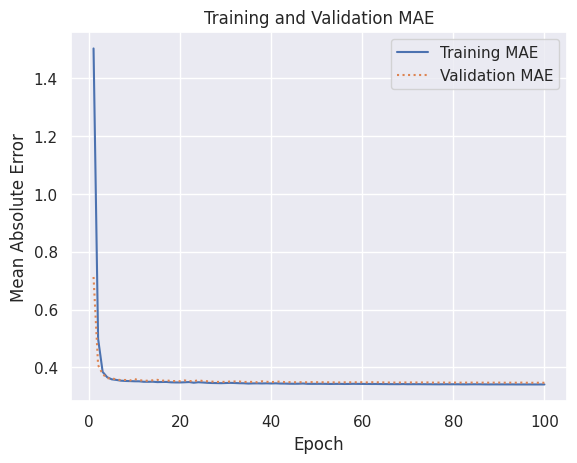

In [71]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.8, patience=5)
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=256, callbacks=[early_stop,reduce_lr], verbose=1)


# Set the style of the plots using seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
plt.show()


In [72]:
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.9734132289886475


In [73]:
print(mae)

0.3647091392419836


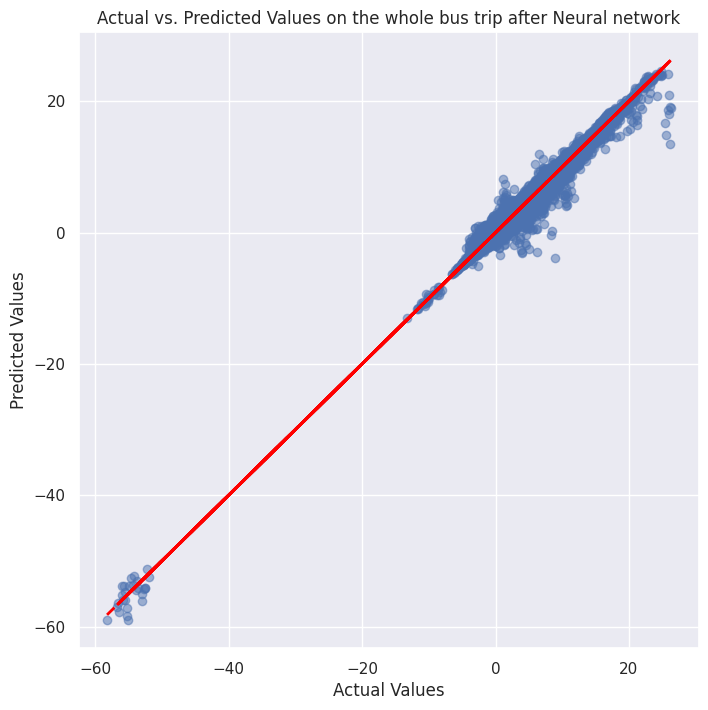

In [74]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values on the whole bus trip after Neural network")

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()